In [280]:
import json
import numpy as np
import random
from random import randint, choice
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [282]:
# open everything in the JSON directory
jsondata = []
for filename in os.listdir("json"):
    with open("json/"+filename) as json_file:  
        jsondata.append(json.load(json_file))
print(len(jsondata))
#jsondata = jsondata[0:10]

16


In [283]:
class_names = []
for move in jsondata:
    class_names.append(move["movename"])
print(class_names)

['Shake It All About', 'The Nobody', 'The Juju Jive', 'African Sun Calling', 'The Wave', 'Running Man', 'The Funky Jumping Jack', 'The Pushup', 'The Jumping Jack', 'The Bridge Lift', 'Quiet Before the Storm', 'The Pincer', 'The Typening', 'The Sitting Too Close', 'The CJ Sip', 'Mr BigHead']


In [369]:
DATASET_SIZE = 10000
SEQ_LEN = 20*3
N_CLASSES = len(class_names)

def pick_example():
    # balance the classes by first picking a class at random 
    class_id = random.randint(0,N_CLASSES-1)
    move = jsondata[class_id]
    # from class, pick a random recording of move (balanced examples? maybe bad idea though)
    recording = choice(move["saved_recordings"])
    # from recording, pick random subsequence 
    start = random.randint(0,len(recording)-SEQ_LEN-1)
    example = recording[start:start+SEQ_LEN]
    frames = []
    for frame in example:
        frames.append(np.array(frame[1]))
    return (frames, class_id)

## build a batch
def generate_dataset():
    dataset = []
    labels = []
    for n in range(DATASET_SIZE):
        (example, class_id) = pick_example()
        dataset.append(example)
        labels.append(class_id)
    dataset = np.array(dataset)
    dataset = normalize_dataset(dataset)
    labels = np.array(labels)
    _ = np.zeros((labels.shape[0], labels.max()+1))
    _[np.arange(labels.shape[0]),labels] = 1
    labels = _
    return (dataset, labels)

def normalize_dataset(dataset):
    b_x = dataset[:,:,:,0]
    x_mean = np.mean(b_x)
    x_std = np.std(b_x)
    b_x -= x_mean
    b_x /= x_std
    np.clip(b_x, -1, 1, out=b_x)

    b_y = dataset[:,:,:,1]
    y_mean = np.mean(b_y)
    y_std = np.std(b_y)
    b_y -= y_mean
    b_y /= 2*y_std
    np.clip(b_y, -1, 1, out=b_y)

    b2 = np.copy(dataset)

    b2[:,:,:,0] = b_x
    b2[:,:,:,1] = b_y
    print("x_mean", x_mean)
    print("x_std", x_std)
    print("y_mean", y_mean)
    print("y_std", y_std)
    return b2

(dataset, labels) = generate_dataset()
print(dataset.shape, labels.shape)

x_mean 296.23579343137254
x_std 104.47678074054872
y_mean 296.20834970588237
y_std 131.01498800020616
(10000, 60, 17, 3) (10000, 16)


In [370]:
print()

()
()
(10000, 60, 17)


/home/cj/anaconda3/envs/keras2/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


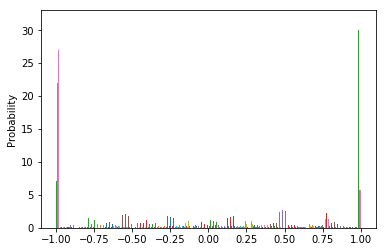

In [326]:
# normalize the data further

x_values = np.copy(b[:,:,:,0])
#print(np.mean(x_values,axis=0).shape)
#print(np.std(x_values,axis=0).shape)
#x_values -= np.mean(x_values,axis=0)
#x_values /= 3*np.std(x_values,axis=0)
print(np.mean(x_values).shape)
print(np.std(x_values).shape)
x_mean = np.mean(x_values)
x_std = np.std(x_values)
x_values -= x_mean
x_values /= x_std
print(x_values.shape)
x_values = np.reshape(x_values,(-1,17))
np.clip(x_values, -1, 1, out=x_values)
#x_values += 1
#x_values /= 2

plt.hist(x_values, normed=True, bins=100)
plt.ylabel('Probability');


(10000, 60, 17)


/home/cj/anaconda3/envs/keras2/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


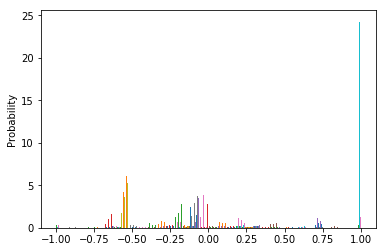

In [327]:
# normalize the data further

y_values = np.copy(b[:,:,:,1])
y_mean = np.mean(y_values)
y_std = np.std(y_values)
y_values -= y_mean
y_values /= 2*y_std
print(y_values.shape)
y_values = np.reshape(y_values,(-1,17))
np.clip(y_values, -1, 1, out=y_values)
#x_values += 1
#x_values /= 2

plt.hist(y_values, normed=True, bins=100)
plt.ylabel('Probability');


In [328]:
print(x_mean)
print(x_std)
print(y_mean)
print(y_std)
"""
x_mean 296.07982264705885
x_std 100.7417859650277
y_mean 296.39747960784314
y_std 126.96237715521292


"""

-0.014789751391315721
0.46385606741322205
-0.007188943521281191
0.37765950447096397


'\nx_mean 296.07982264705885\nx_std 100.7417859650277\ny_mean 296.39747960784314\ny_std 126.96237715521292\n\n\n'

/home/cj/anaconda3/envs/keras2/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


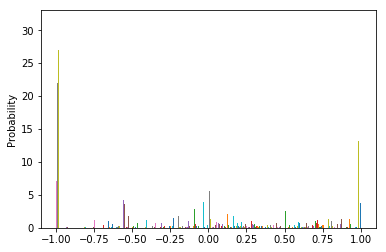

In [329]:
b_x = b[:,:,:,0]
b_x -= x_mean
b_x /= x_std
np.clip(b_x, -1, 1, out=b_x)

b_y = b[:,:,:,1]
b_y -= y_mean
b_y /= 2*y_std
np.clip(b_y, -1, 1, out=b_y)

b2 = np.copy(b)

b2[:,:,:,0] = b_x
b2[:,:,:,1] = b_y

b2 = np.reshape(b2,(-1,17*3))
plt.hist(b2, normed=True, bins=100)
plt.ylabel('Probability');


/home/cj/anaconda3/envs/keras2/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


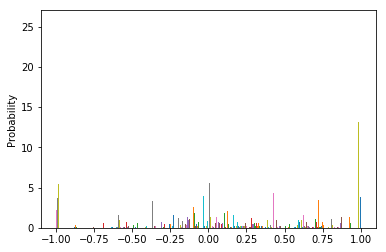

In [160]:

b2 = np.reshape(b,(-1,17*3))
plt.hist(b2, normed=True, bins=100)
plt.ylabel('Probability');


## TRAINING

In [331]:
# LSTM for sequence classification in the IMDB dataset
import keras
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers.pooling import MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.layers import Input, Flatten

# fix random seed for reproducibility
np.random.seed(7)


In [440]:
(dataset, labels) = generate_dataset()
print(dataset.shape, labels.shape)

(dataset2, labels2) = generate_dataset()


num_classes = N_CLASSES
input_shape = dataset.shape[1:]

model = Sequential()
model.add(Conv2D(128, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu',
                 input_shape=(input_shape)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, kernel_initializer='uniform', activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(Dense(1000, kernel_initializer='uniform', activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

opt = keras.optimizers.Adagrad(lr=0.001, epsilon=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
print(model.summary())

x_mean 296.19112352941175
x_std 98.23389438334448
y_mean 296.12398323529413
y_std 124.22041547509181
(10000, 60, 17, 3) (10000, 16)
x_mean 295.81029343137254
x_std 99.31187647194372
y_mean 295.2550669607843
y_std 125.8251187747067
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 56, 13, 128)       9728      
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 28, 6, 128)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 24, 2, 64)         204864    
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 12, 1, 64)         0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 768)               0         
___________________________________________

In [452]:

model.fit(dataset, labels, epochs=40, batch_size=64,validation_split=0.2)
# Final evaluation of the model
scores = model.evaluate(dataset2, labels2, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 8000 samples, validate on 2000 samples
Epoch 1/40
8000/8000 [==============================] - 1s 123us/step - loss: 8.2681e-04 - acc: 1.0000 - val_loss: 1.7014e-04 - val_acc: 1.0000
Epoch 2/40
8000/8000 [==============================] - 1s 121us/step - loss: 6.9628e-04 - acc: 1.0000 - val_loss: 1.4403e-04 - val_acc: 1.0000
Epoch 3/40
8000/8000 [==============================] - 1s 120us/step - loss: 6.4771e-04 - acc: 1.0000 - val_loss: 1.7380e-04 - val_acc: 1.0000
Epoch 4/40
8000/8000 [==============================] - 1s 121us/step - loss: 7.5972e-04 - acc: 1.0000 - val_loss: 1.3746e-04 - val_acc: 1.0000
Epoch 5/40
8000/8000 [==============================] - 1s 122us/step - loss: 7.2590e-04 - acc: 1.0000 - val_loss: 1.2912e-04 - val_acc: 1.0000
Epoch 6/40
8000/8000 [==============================] - 1s 123us/step - loss: 6.8803e-04 - acc: 1.0000 - val_loss: 1.3448e-04 - val_acc: 1.0000
Epoch 7/40
8000/8000 [==============================] - 1s 122us/step - loss: 6.5873e-04

KeyboardInterrupt: 

In [295]:
import tensorflowjs as tfjs

In [465]:
# serialize model to JSON
model_json = model.to_json()
with open("model3.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model3.h5")
print("Saved model to disk")

Saved model to disk


In [466]:
from keras.models import model_from_json

# load json and create model
json_file = open('model3.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model3.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(dataset_test, labels_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
acc: 100.00%


In [223]:
import tensorflowjs as tfjs

In [467]:
tfjs.converters.save_keras_model(model, "tfjs3")

In [337]:
score = loaded_model.evaluate(dataset_train, labels_train, verbose=1)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

9500/9500 [==============================] - 1s 82us/step
acc: 88.25%


In [468]:
score = model.evaluate(dataset2, labels2, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

10000/10000 [==============================] - 1s 83us/step
acc: 100.00%


In [460]:
predictions = model.predict_classes(dataset2)
difference = np.abs(np.argmax(labels2,axis=1) - predictions)
np.sum(difference)

0

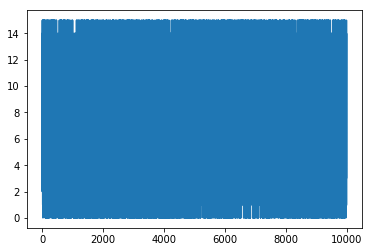

In [461]:
predictions = model.predict_classes(dataset2)
plt.plot(predictions)

/home/cj/anaconda3/envs/keras2/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


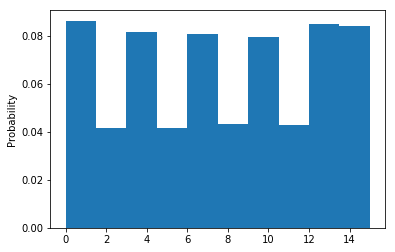

In [462]:

plt.hist(predictions, normed=True)
plt.ylabel('Probability');

/home/cj/anaconda3/envs/keras2/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


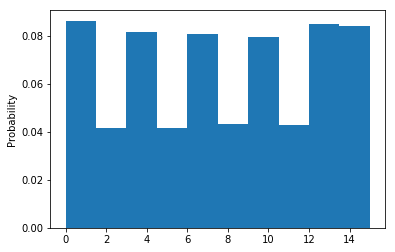

In [464]:
plt.hist(np.argmax(labels2,axis=1), normed=True)
plt.ylabel('Probability');

53767